# ANN Model - Main

In [30]:
import traceback

try:
    import numpy as np
    import pandas as pd
    import sklearn
    import scipy as sp
    import math
    import matplotlib.pyplot as plt
    import seaborn as sns
    import datetime
    import csv
    import os
    import code
    import time
    import statsmodels.api as sm

    from sklearn.neural_network import MLPRegressor
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score
    
    import warnings
    warnings.filterwarnings('ignore')


except:
    
    print(traceback.print_exc())
    input("\nError BC.\n")



In [9]:
# Dataset after the pre-processing

data0 = pd.read_csv(r"data0.csv", decimal = ",")
data0["date"] = data0["date"].astype('datetime64[ns]')

In [10]:
nor_data0 = data0.iloc[:,1:22]
norm_data0=(nor_data0-nor_data0.min())/(nor_data0.max()-nor_data0.min())

In [11]:
X_0 = norm_data0
y_0 = data0["% Silica Concentrate"]

In [13]:
X_1 = X_0.sample(frac = 0.70)
y_1 = y_0[X_1.index]
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.3, random_state = 1)

In [14]:
regr = MLPRegressor(random_state=69, hidden_layer_sizes = (256,256,256,256), activation = 'relu', solver = 'adam',
                    learning_rate = 'adaptive', max_iter = 1000,
                    batch_size = 'auto', verbose = 'True')
regr.fit(X_train, y_train)



Iteration 1, loss = 0.45079204
Iteration 2, loss = 0.33872159
Iteration 3, loss = 0.27895951
Iteration 4, loss = 0.24189791
Iteration 5, loss = 0.21883027
Iteration 6, loss = 0.20033142
Iteration 7, loss = 0.18441846
Iteration 8, loss = 0.17192647
Iteration 9, loss = 0.16167939
Iteration 10, loss = 0.15272827
Iteration 11, loss = 0.14581090
Iteration 12, loss = 0.13905686
Iteration 13, loss = 0.13336447
Iteration 14, loss = 0.12819887
Iteration 15, loss = 0.12324270
Iteration 16, loss = 0.11947942
Iteration 17, loss = 0.11513542
Iteration 18, loss = 0.11175132
Iteration 19, loss = 0.11007535
Iteration 20, loss = 0.10600943
Iteration 21, loss = 0.10339331
Iteration 22, loss = 0.10118138
Iteration 23, loss = 0.09886418
Iteration 24, loss = 0.09722720
Iteration 25, loss = 0.09458662
Iteration 26, loss = 0.09334473
Iteration 27, loss = 0.09145046
Iteration 28, loss = 0.09002704
Iteration 29, loss = 0.08863629
Iteration 30, loss = 0.08667412
Iteration 31, loss = 0.08571256
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(256, 256, 256, 256), learning_rate='adaptive',
             max_iter=1000, random_state=69, verbose='True')

In [16]:
y_pred=regr.predict(X_test)

In [17]:
mean_squared_error(y_test, y_pred) , r2_score(y_test, y_pred)

(0.18116265477938967, 0.8571118156551386)

filename = 'regr_model_100x100(70-30).sav'
import pickle
pickle.dump(regr, open(filename, 'wb'))


Mean Squared Error: 0.18116265477938967
R2 Score: 0.8571118156551386
Mean Absolute Error: 0.276748172069098
Mean Squared Error: 0.18116265477938967
Root Mean Squared Error: 0.42563206502728346


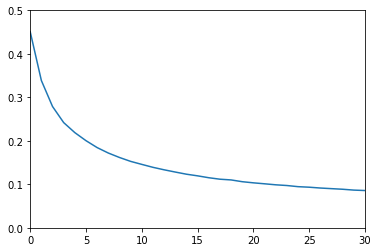

In [18]:
"""(random_state=69, hidden_layer_sizes = (256,256,256,256),
                    activation = 'relu', solver = 'adam',
                    learning_rate = 'adaptive', max_iter = 1000,
                    batch_size = 'auto', verbose = 'True')
"""

plt.plot(regr.loss_curve_)
plt.ylim([0,0.5])
plt.xlim([0,30])


print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) 

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Absolute Error:',
      sklearn.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',
      sklearn.metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))




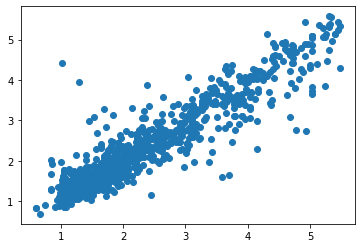

In [59]:
"""

From scatter plots of Actual vs Predicted You can tell how well
the model is performing. For Ideal model, the points should be
closer to a diagonal line.

"""

plt.scatter(y_test[0:1000],y_pred[0:1000])
plt.show()

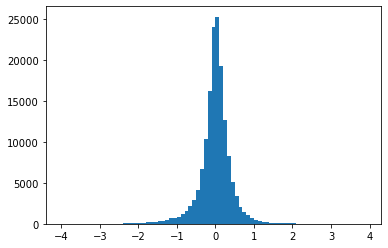

In [51]:
#Histogram of residual

"""

Residuals in a statistical or machine learning model are
the differences between observed and predicted values of data.

One of the assumption in Linear regression is that the residual
should be normally distributed, if your model’s residual is not
normally distributed it will not have a bell shaped curve which
indicates that your model is not bias and in this case for your
dateset regression may not be an appropriate choice.

"""

plt.hist((y_pred-y_test), bins = np.arange(-4,4,0.1))
plt.show()

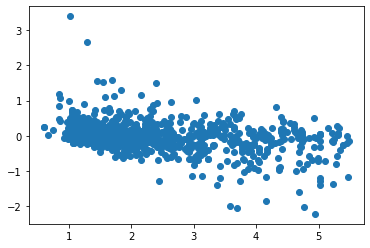

In [57]:
"""

In this scatter plot the y axis represents
residuals and the x axis represented fitted values
or predicted value. This plot is used to detect non-linearity,
unequal error variances, and outliers in the model.


Here we compare the first 1000 datapoints.

"""

plt.scatter(y_test[0:1000], (y_pred[0:1000]-y_test[0:1000]))
plt.show()